In [1]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

In [2]:
# Import Data

data = pd.read_csv('data/data_prep_reg.csv', index_col=[0])
#data = pd.read_csv('data/data_prep_feat.csv', index_col=[0])
#fillna
data = data.fillna(data.mean())
print(f'Data: {data.shape}')


Data: (4990, 44)


In [3]:
data.head()

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333
10,3,55.638261,34.041667,17.191667,23.189507,4.432786,19.649595,22.033333,16.850000,10.302,...,0.533776,0.840833,3.285000,90.986667,90.211667,90.624814,0.179998,0.032399,90.641667,0.775000
13,3,32.240851,29.608333,19.166667,23.151446,2.808773,7.889204,22.291667,10.441667,2.229,...,0.195908,0.627500,1.705000,90.744167,90.102500,90.454477,0.149374,0.022312,90.471667,0.641667
15,3,72.717021,29.133333,17.516667,22.341529,3.161073,9.992384,21.683333,11.616667,13.588,...,0.124645,0.625000,1.608333,90.873333,90.284167,90.607307,0.139059,0.019337,90.620833,0.589167
22,3,35.833571,30.558333,16.983333,22.401240,3.592899,12.908921,21.333333,13.575000,43.080,...,0.186272,0.678333,2.197500,91.004167,90.217500,90.600544,0.172882,0.029888,90.600833,0.786667


In [4]:
columns_to_drop = ['target', 'location']
# define features and target
X = data.drop(columns_to_drop, axis=1)
y = data.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (4990, 42)
y: (4990,)
X_train: (3493, 42)
y_train: (3493,)
X_test: (1497, 42)
y_test: (1497,)


In [5]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

# SGD Regressor

In [6]:
# Scaling with standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Instantiate our model 
sgd_reg = SGDRegressor()
sgd_reg_scaled = SGDRegressor()
# Train the model using our data
sgd_reg.fit(X_train, y_train)
sgd_reg_scaled.fit(X_train_scaled, y_train)

SGDRegressor()

In [8]:
# predict

y_pred_train = sgd_reg.predict(X_train)
y_pred_test = sgd_reg.predict(X_test)

y_pred_train_scaled = sgd_reg_scaled.predict(X_train_scaled)
y_pred_test_scaled = sgd_reg_scaled.predict(X_test_scaled)

In [9]:
rsme_sgd_reg_train = rmse(y_train, y_pred_train)
rsme_sgd_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_sgd_reg_train}')
print(f'RSME _ test: {rsme_sgd_reg_test}')

rsme_sgd_reg_train_scaled = rmse(y_train, y_pred_train_scaled )
rsme_sgd_reg_test_scaled = rmse(y_test, y_pred_test_scaled )

print(f'RSME _ train_scaled: {rsme_sgd_reg_train_scaled:.2f}')
print(f'RSME _ test_scaled: {rsme_sgd_reg_test_scaled:.2f}')

RSME _ train: 1.2570931284538082e+16
RSME _ test: 1.2596621341663554e+16
RSME _ train_scaled: 25.97
RSME _ test_scaled: 28.09


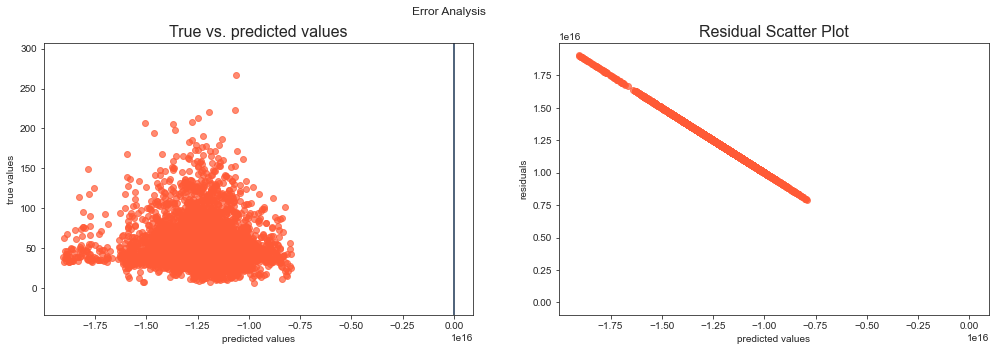

In [10]:
# error analysis train:
error_analysis(y_train, y_pred_train)

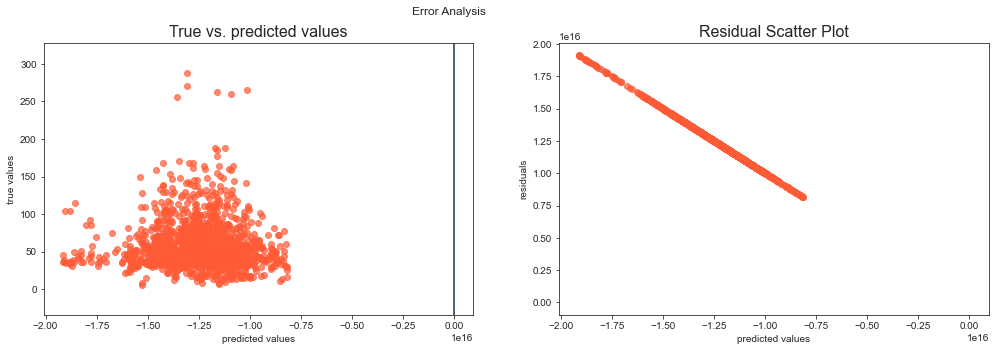

In [11]:
# error analysis test:
error_analysis(y_test, y_pred_test)

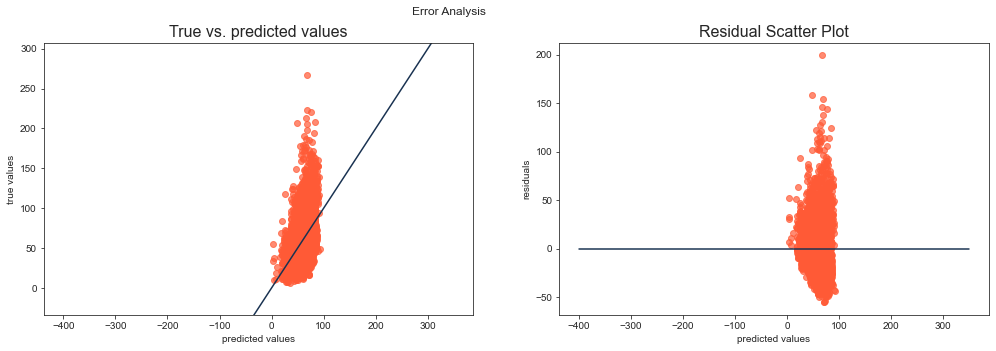

In [12]:
# error analysis train:
error_analysis(y_train, y_pred_train_scaled)

## with polynomial features and scaled data

In [13]:
# import to create polynomial features
from sklearn.preprocessing import PolynomialFeatures
# here we will add the second degree polynomial features
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly_train = polynomial_features.fit_transform(X_train_scaled)   # shape (20,2) # x , x2
x_poly_test = polynomial_features.transform(X_test_scaled)

model_poly = SGDRegressor(penalty='l2')
model_poly.fit(x_poly_train, y_train)
y_pred_test = model_poly.predict(x_poly_test)
y_pred_train = model_poly.predict(x_poly_train)

In [14]:
y_pred_train = sgd_reg.predict(X_train)
y_pred_test = sgd_reg.predict(X_test)

y_pred_train_scaled = sgd_reg_scaled.predict(X_train_scaled)
y_pred_test_scaled = sgd_reg_scaled.predict(X_test_scaled)

RSME _ train: 1.2570931284538082e+16
RSME _ test: 1.2596621341663554e+16


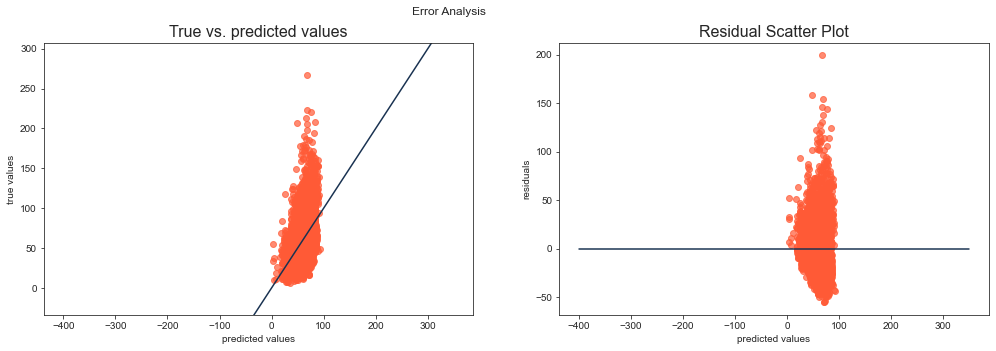

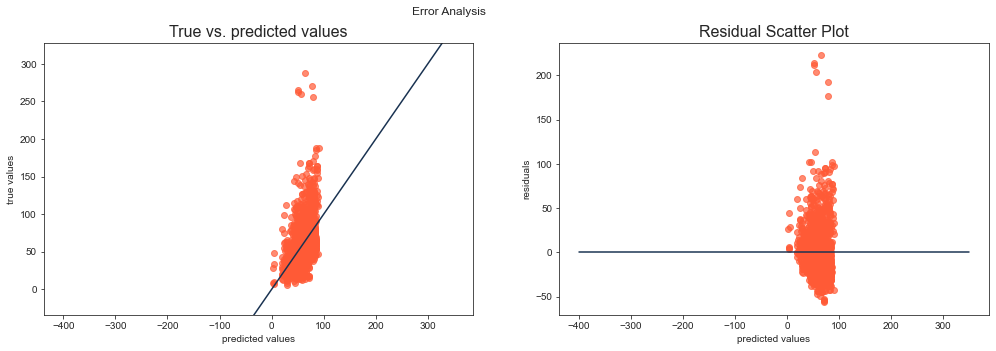

In [15]:
rsme_sgd2_train = rmse(y_train, y_pred_train)
rsme_sgd2_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_sgd2_train}')
print(f'RSME _ test: {rsme_sgd2_test}')

error_analysis(y_train, y_pred_train_scaled)
error_analysis(y_test, y_pred_test_scaled)

# Grid Search

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
# Defining parameter grid (as dictionary)
param_grid = {"alpha" : [0.00001,0.0001, 0.001, 0.01, 0.1],
              "penalty" : ["l2", "l1", "elasticnet"]
             }
gs = GridSearchCV(SGDRegressor(random_state=100), param_grid, scoring='neg_root_mean_squared_error',
                  cv=5, verbose=5, n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes

gs.fit(X_train_scaled, y_train)



Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .........alpha=1e-05, penalty=l2;, score=-25.788 total time=   0.0s
[CV 4/5] END .........alpha=1e-05, penalty=l1;, score=-26.080 total time=   0.0s
[CV 2/5] END .........alpha=1e-05, penalty=l2;, score=-26.742 total time=   0.0s
[CV 5/5] END .........alpha=1e-05, penalty=l2;, score=-27.180 total time=   0.0s
[CV 5/5] END .........alpha=1e-05, penalty=l1;, score=-27.180 total time=   0.0s
[CV 3/5] END .........alpha=1e-05, penalty=l2;, score=-25.810 total time=   0.0s
[CV 4/5] END .........alpha=1e-05, penalty=l2;, score=-26.080 total time=   0.0s
[CV 1/5] END .alpha=1e-05, penalty=elasticnet;, score=-25.788 total time=   0.0s
[CV 1/5] END .........alpha=1e-05, penalty=l1;, score=-25.788 total time=   0.0s
[CV 2/5] END .alpha=1e-05, penalty=elasticnet;, score=-26.742 total time=   0.0s
[CV 5/5] END .alpha=1e-05, penalty=elasticnet;, score=-27.180 total time=   0.0s
[CV 4/5] END .alpha=1e-05, penalty=elasticnet;, 

GridSearchCV(cv=5, estimator=SGDRegressor(random_state=100), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='neg_root_mean_squared_error', verbose=5)

In [18]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

    
# Assigning the fitted SGDClassifier model with best parameter combination to a new variable sgd_best
sgd_best = gs.best_estimator_

# Making predictions on the test set
y_pred_test = sgd_best.predict(X_test_scaled)
y_pred_train = sgd_best.predict(X_train_scaled)

Best score: -26.316
Best parameters: {'alpha': 0.01, 'penalty': 'l1'}


In [19]:
rsme_sgd_best_train = rmse(y_train, y_pred_train)
rsme_sgd_best_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_sgd_best_train}')
print(f'RSME _ test: {rsme_sgd_best_test}')

RSME _ train: 26.014018462918543
RSME _ test: 28.1128582899252


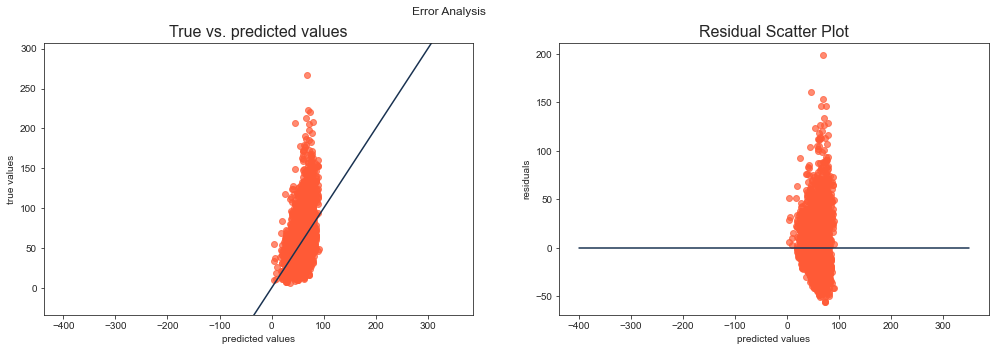

In [20]:
# error analysis train:
error_analysis(y_train, y_pred_train)